In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install split-folders[full]

In [ ]:
import pandas as pd
import shutil
import os
import splitfolders



In [ ]:
# Read the CSV file
df = pd.read_csv('/content/gdrive/MyDrive/aml project/train.csv')
df

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
...,...,...
3657,ffa47f6a7bf4,2
3658,ffc04fed30e6,0
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0


In [ ]:
'''
cl1=df[df.diagnosis==0]
cl2=df[df.diagnosis==1]
cl3=df[df.diagnosis==2]
cl4=df[df.diagnosis==3]
cl5=df[df.diagnosis==4]69

import shutil
import os

# Set the source and destination paths
src_path = '/content/gdrive/MyDrive/aml project/train_images/'
for i in cl1.id_code:
  try:
    shutil.copy(src_path+i+'.png', '/content/gdrive/MyDrive/output/class1')
  except:
    continue
for i in cl2.id_code:
  try:
    shutil.copy(src_path+i+'.png', '/content/gdrive/MyDrive/output/class2')
  except:
    continue
for i in cl3.id_code:
  try:
    shutil.copy(src_path+i+'.png', '/content/gdrive/MyDrive/output/class3')
  except:
    continue
for i in cl4.id_code:
  try:
    shutil.copy(src_path+i+'.png', '/content/gdrive/MyDrive/output/class4')
  except:
    continue
for i in cl5.id_code:
  try:
    shutil.copy(src_path+i+'.png', '/content/gdrive/MyDrive/output/class5')
  except:
    continue'''

"\ncl1=df[df.diagnosis==0]\ncl2=df[df.diagnosis==1]\ncl3=df[df.diagnosis==2]\ncl4=df[df.diagnosis==3]\ncl5=df[df.diagnosis==4]69\n\nimport shutil\nimport os\n\n# Set the source and destination paths\nsrc_path = '/content/gdrive/MyDrive/aml project/train_images/'\nfor i in cl1.id_code:\n  try:\n    shutil.copy(src_path+i+'.png', '/content/gdrive/MyDrive/output/class1')\n  except:\n    continue\nfor i in cl2.id_code:\n  try:\n    shutil.copy(src_path+i+'.png', '/content/gdrive/MyDrive/output/class2')\n  except:\n    continue\nfor i in cl3.id_code:\n  try:\n    shutil.copy(src_path+i+'.png', '/content/gdrive/MyDrive/output/class3')\n  except:\n    continue\nfor i in cl4.id_code:\n  try:\n    shutil.copy(src_path+i+'.png', '/content/gdrive/MyDrive/output/class4')\n  except:\n    continue\nfor i in cl5.id_code:\n  try:\n    shutil.copy(src_path+i+'.png', '/content/gdrive/MyDrive/output/class5')\n  except:\n    continue"

In [ ]:
'''splitfolders.ratio("/content/gdrive/MyDrive/output", output="/content/gdrive/MyDrive/split",
    seed=1337, ratio=(.8,.2), group_prefix=None, move=False)'''

'splitfolders.ratio("/content/gdrive/MyDrive/output", output="/content/gdrive/MyDrive/split",\n    seed=1337, ratio=(.8,.2), group_prefix=None, move=False)'

In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import PIL.ImageOps as ImageOps
import pandas as pd
import PIL.Image as Image
from tqdm import tqdm
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [ ]:
class_names = ['No-DR','Mild','Moderate','Severe','Proliferative DR']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [ ]:
def pre_process(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE)
    return image

In [ ]:
def load_data():

    datasets = ["/content/gdrive/MyDrive/split/train","/content/gdrive/MyDrive/split/val"]
    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = pre_process(img_path)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /content/gdrive/MyDrive/split/train


100%|██████████| 38/38 [00:39<00:00,  1.04s/it]


Loading /content/gdrive/MyDrive/split/val


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 1067
Number of testing examples: 268
Each image is of size: (150, 150)


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
def display_examples(class_names, images, labels):

    fig = plt.figure(figsize=(15,15))
    fig.suptitle("EXAMPLES OF IMAGES FROM THE DATASET", fontsize=16)
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]],fontsize=10)
    plt.show()

In [ ]:
def display_random_image(class_names, images, labels):

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

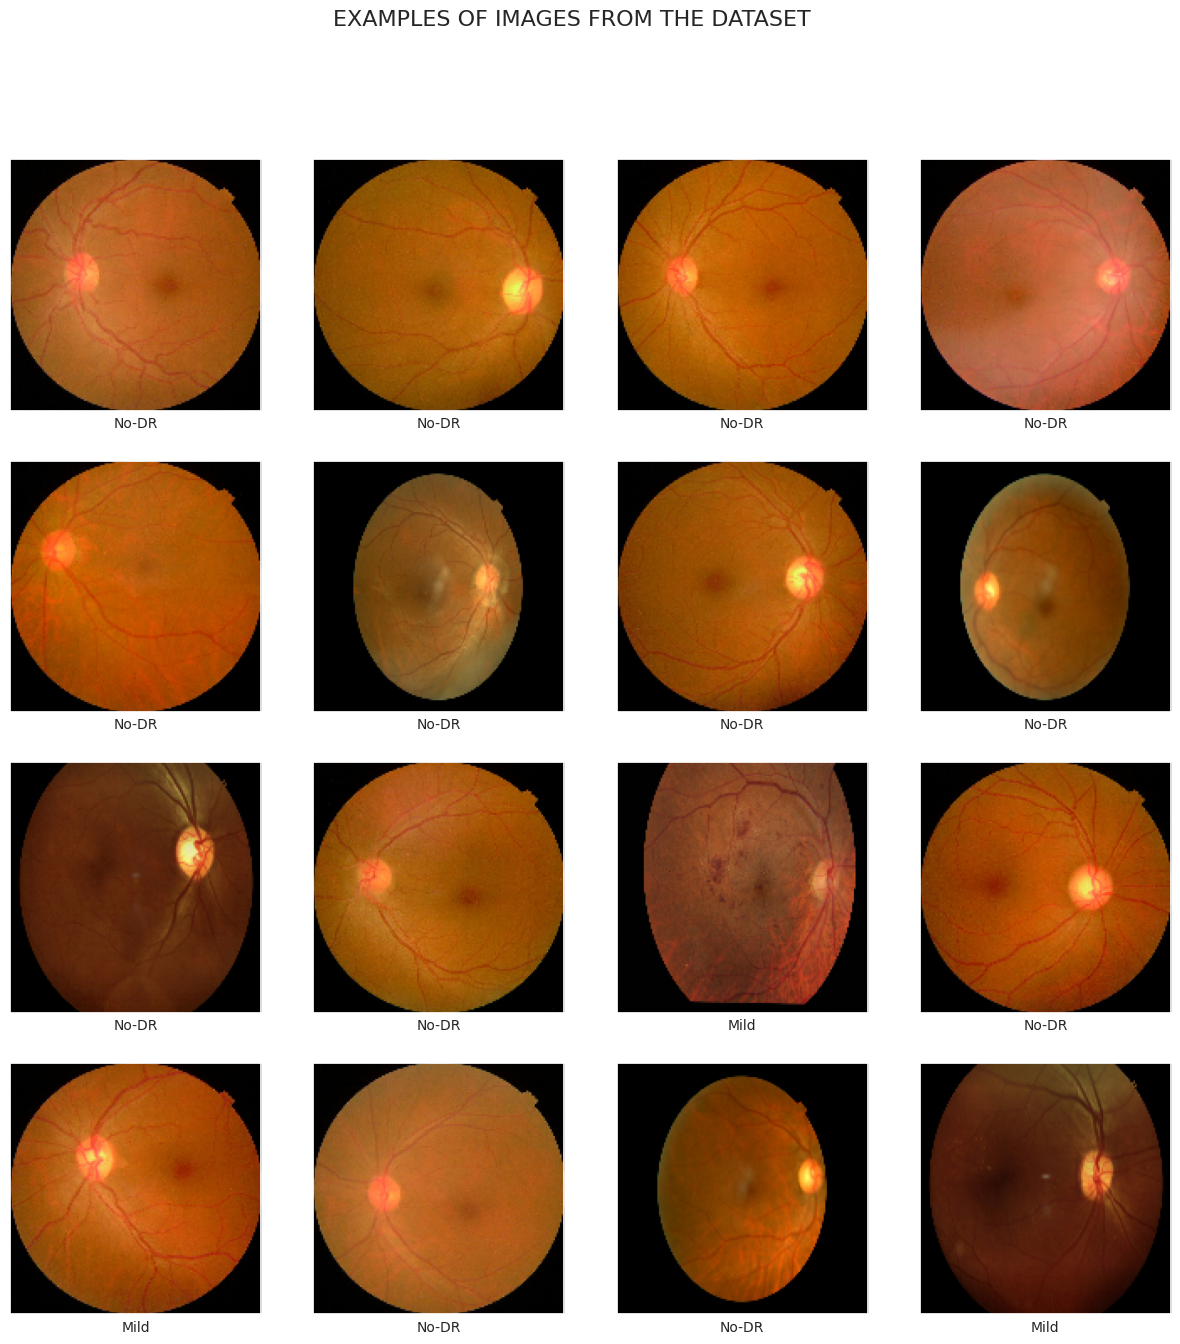

In [ ]:
display_examples(class_names, train_images, train_labels)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(30, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 [==============================] - 26s 4s/step - loss: 1.5757 - accuracy: 0.6800 - val_loss: 0.7800 - val_accuracy: 0.8178
Epoch 2/10
7/7 [==============================] - 27s 4s/step - loss: 0.7597 - accuracy: 0.8066 - val_loss: 0.5952 - val_accuracy: 0.8178
Epoch 3/10
7/7 [==============================] - 29s 4s/step - loss: 0.5906 - accuracy: 0.8242 - val_loss: 0.4934 - val_accuracy: 0.8879
Epoch 4/10
7/7 [==============================] - 26s 4s/step - loss: 0.4947 - accuracy: 0.8710 - val_loss: 0.4535 - val_accuracy: 0.8832
Epoch 5/10
7/7 [==============================] - 25s 4s/step - loss: 0.4433 - accuracy: 0.8734 - val_loss: 0.4284 - val_accuracy: 0.8925
Epoch 6/10
7/7 [==============================] - 25s 4s/step - loss: 0.4173 - accuracy: 0.8804 - val_loss: 0.4044 - val_accuracy: 0.8972
Epoch 7/10
7/7 [==============================] - 30s 4s/step - loss: 0.4030 - accuracy: 0.8781 - val_loss: 0.4078 - val_accuracy: 0.8879
Epoch 8/10
7/7 [=============================

In [ ]:
def plot_accuracy_loss(history):
    """
        We plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

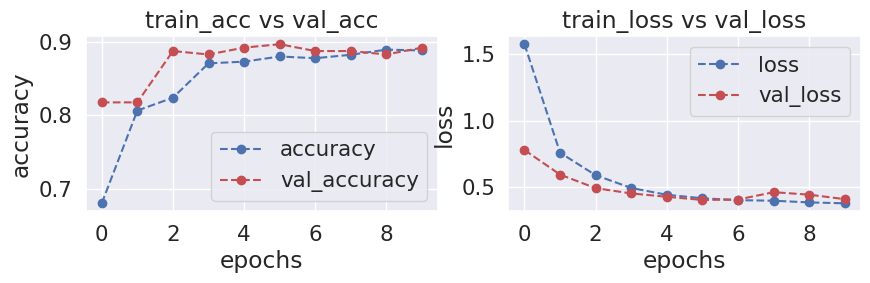

In [ ]:
plot_accuracy_loss(history)

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

9/9 [==============================] - 2s 189ms/step - loss: 0.5221 - accuracy: 0.8582


9/9 [==============================] - 2s 190ms/step


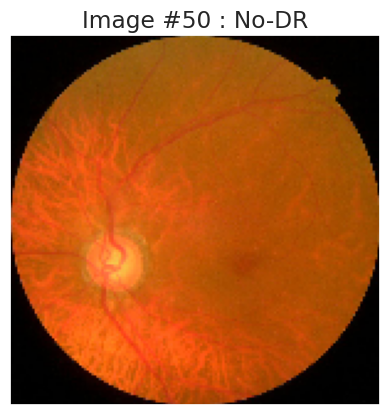

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)


In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2

In [ ]:
x_train = train_images/255.0
x_test = test_images/255.0
y_train=train_labels
y_test=test_labels

In [ ]:
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [ ]:
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

In [ ]:
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
st_x= StandardScaler()
st_y=MaxAbsScaler()
scaler=st_y.fit(x_train2)
x_train2=scaler.transform(x_train2)

In [ ]:
from sklearn.linear_model import LogisticRegression
a=LogisticRegression()
a.fit(x_train2,y_train)
y_pred1=a.predict(x_test2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
c=DecisionTreeClassifier()
c.fit(x_train2,y_train)
y_pred3=c.predict(x_test2)

In [ ]:
from sklearn.naive_bayes import GaussianNB
d=GaussianNB()
d.fit(x_train2,y_train)
y_pred4=d.predict(x_test2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
e=RandomForestClassifier(n_estimators=100)
e.fit(x_train2,y_train)
y_pred5=e.predict(x_test2)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
j=[accuracy_score(y_test,i) for i in [y_pred1,y_pred3,y_pred4,y_pred5]]
cm1=confusion_matrix(y_test,y_pred1)
cm3=confusion_matrix(y_test,y_pred3)
cm4=confusion_matrix(y_test,y_pred4)
cm5=confusion_matrix(y_test,y_pred5)
for l in j:
  print(l)


0.8022388059701493
0.8171641791044776
0.7238805970149254
0.8656716417910447


In [ ]:
LR=accuracy_score(y_test,y_pred1)
DTC=accuracy_score(y_test,y_pred3)
GNB=accuracy_score(y_test,y_pred4)
RFC=accuracy_score(y_test,y_pred5)
LR

0.8022388059701493

In [ ]:
print(cm1,cm3,cm4,cm5,sep='\n')

[[215   0   0   0   0]
 [ 11   0   0   0   0]
 [ 28   0   0   0   0]
 [  4   0   0   0   0]
 [ 10   0   0   0   0]]
[[203   0  10   0   2]
 [  5   0   3   0   3]
 [ 10   1  13   2   2]
 [  0   0   3   0   1]
 [  2   2   3   0   3]]
[[186  24   0   0   5]
 [  7   3   0   0   1]
 [ 11  10   4   2   1]
 [  0   2   2   0   0]
 [  3   4   1   1   1]]
[[214   0   1   0   0]
 [  7   1   3   0   0]
 [ 11   2  15   0   0]
 [  0   1   3   0   0]
 [  2   2   4   0   2]]


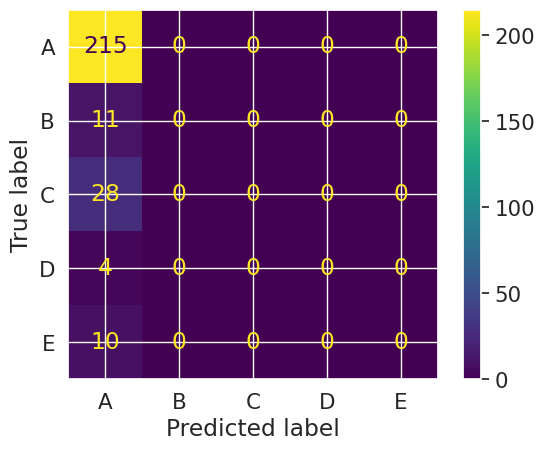

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = ['A','B','C','D','E'])
cm_display.plot()
plt.show()

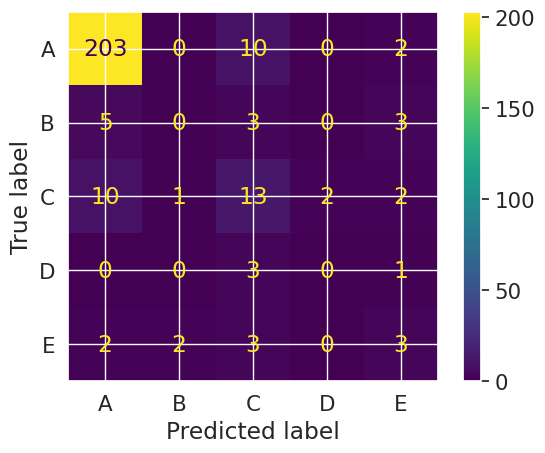

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm3, display_labels = ['A','B','C','D','E'])
cm_display.plot()
plt.show()

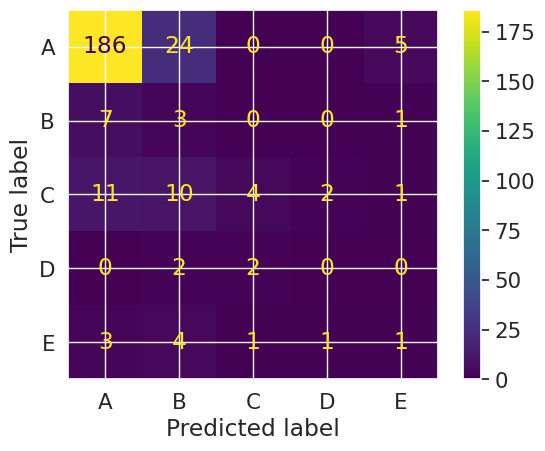

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm4, display_labels = ['A','B','C','D','E'])
cm_display.plot()
plt.show()

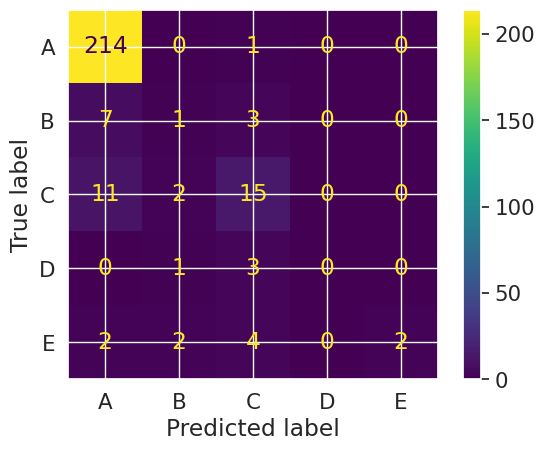

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm5, display_labels = ['A','B','C','D','E'])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
for i in [y_pred1,y_pred3,y_pred4,y_pred5]:
  print(classification_report(y_test,i))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       215
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        10

    accuracy                           0.80       268
   macro avg       0.16      0.20      0.18       268
weighted avg       0.64      0.80      0.71       268

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       215
           1       0.00      0.00      0.00        11
           2       0.41      0.46      0.43        28
           3       0.00      0.00      0.00         4
           4       0.27      0.30      0.29        10

    accuracy                           0.82       268
   macro avg       0.32      0.34      0.33       268
weighted avg       0.79      0.82      0.80       268

              precisio

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
b=KNeighborsClassifier()
b.fit(x_train2,y_train)
y_pred2=b.predict(x_test2)

In [ ]:
KNC=accuracy_score(y_test,y_pred2)
KNC

0.8432835820895522

In [ ]:
cm6=confusion_matrix(y_test,y_pred2)
cm6

array([[212,   0,   3,   0,   0],
       [  7,   2,   2,   0,   0],
       [ 12,   4,  11,   0,   1],
       [  0,   2,   2,   0,   0],
       [  4,   3,   2,   0,   1]])

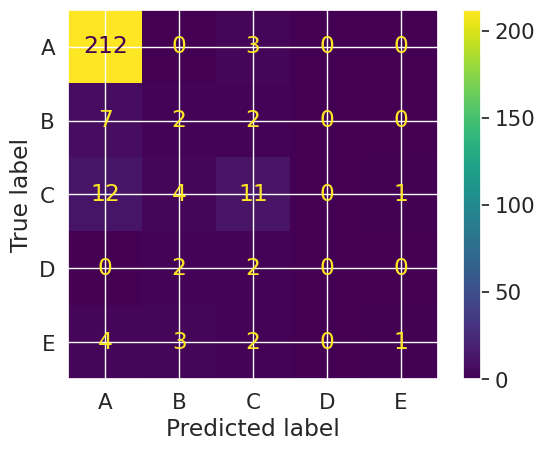

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm6, display_labels = ['A','B','C','D','E'])
cm_display.plot()
plt.show()

In [ ]:
classification_report(y_test,y_pred2)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.90      0.99      0.94       215\n           1       0.18      0.18      0.18        11\n           2       0.55      0.39      0.46        28\n           3       0.00      0.00      0.00         4\n           4       0.50      0.10      0.17        10\n\n    accuracy                           0.84       268\n   macro avg       0.43      0.33      0.35       268\nweighted avg       0.81      0.84      0.82       268\n'

In [ ]:
from sklearn.svm import SVC
h= SVC(kernel='linear', random_state=0)
h.fit(st_x.fit_transform(x_train2),y_train)
y_pred7=h.predict(st_x.transform(x_test2))

In [ ]:
for i in [y_pred7]:
  print(accuracy_score(y_test,i))
SVC=accuracy_score(y_test,y_pred7)

0.8507462686567164


In [ ]:
cm7=confusion_matrix(y_test,y_pred7)
cm7


array([[214,   0,   1,   0,   0],
       [  7,   0,   1,   0,   3],
       [ 12,   3,   8,   1,   4],
       [  0,   0,   2,   2,   0],
       [  2,   0,   3,   1,   4]])

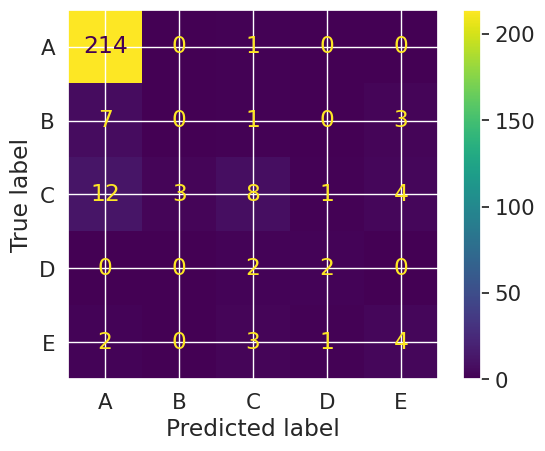

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm7, display_labels = ['A','B','C','D','E'])
cm_display.plot()
plt.show()

In [ ]:
for i in [y_pred7]:
  print(classification_report(y_test,i))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       215
           1       0.00      0.00      0.00        11
           2       0.53      0.29      0.37        28
           3       0.50      0.50      0.50         4
           4       0.36      0.40      0.38        10

    accuracy                           0.85       268
   macro avg       0.46      0.44      0.44       268
weighted avg       0.81      0.85      0.82       268



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AC=AdaBoostClassifier()
AC.fit(x_train2,y_train)
ypred8=AC.predict(x_test2)
ABC=accuracy_score(y_test,ypred8)

In [ ]:
ABC

0.7649253731343284

In [ ]:
cm8=confusion_matrix(y_test,y_pred2)
cm8

array([[212,   0,   3,   0,   0],
       [  7,   2,   2,   0,   0],
       [ 12,   4,  11,   0,   1],
       [  0,   2,   2,   0,   0],
       [  4,   3,   2,   0,   1]])

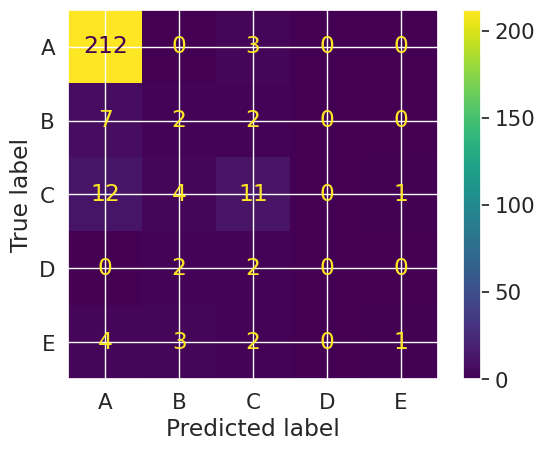

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm8, display_labels = ['A','B','C','D','E'])
cm_display.plot()
plt.show()

In [ ]:
CNN=0.90124575

In [ ]:
acc = [LR, DTC,GNB,RFC,KNC,SVC,ABC,CNN]
models = ['LR','DT', 'GNB', 'RF','KNC' ,'SVM' ,'ABC','CNN']

<Axes: xlabel='algorithm', ylabel='accuracy'>

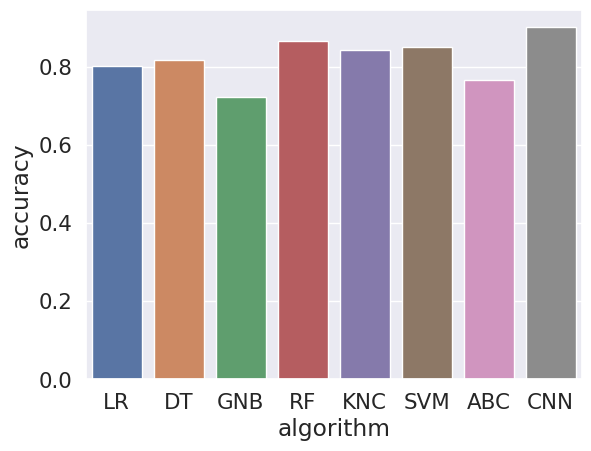

In [ ]:
import seaborn as sns

sns.barplot(data=pd.DataFrame({"algorithm":models,"accuracy":acc}),x="algorithm",y="accuracy")